In [1]:
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import torchvision.utils as tutils
from torchvision import datasets
from torchvision import transforms
import os
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torch
import torchvision
import utils
import dataLoading
from shading import *

/home/bhushan/anaconda3/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [62]:
def show(img):
    npimg = img.numpy()
    plt.figure(figsize=(10,6))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

In [3]:
h5 = h5py.File('/home/bhushan/college/CV/Thesis/Projects/lightestimation/Light-Estimation/LDAN/SfSNet/moreSyn/resnet_SfSNet_Test/results.h5', 'r')
h5.keys()

[u'expected_sh', u'mask', u'predicted_sh', u'sirfs_normal', u'true_normal']

In [56]:
predicted_sh = Variable(torch.from_numpy(np.array(h5['predicted_sh'])))
expected_sh = Variable(torch.from_numpy(np.array(h5['expected_sh'])))

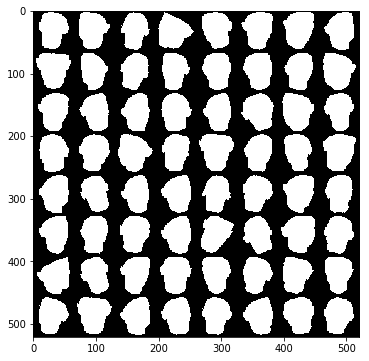

In [66]:
mask = torch.from_numpy(np.array(h5['mask']))
mask = mask.type(torch.DoubleTensor)
show(torchvision.utils.make_grid(mask*255, padding=1))

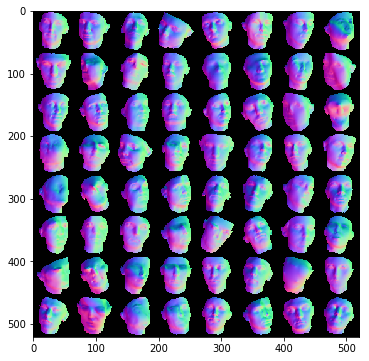

In [64]:
sirfs_normal = torch.from_numpy(np.array(h5['sirfs_normal']))
sNormal = Variable(sirfs_normal)
sNormal = denorm(sNormal)
show(torchvision.utils.make_grid(sNormal.data*mask, padding=1))

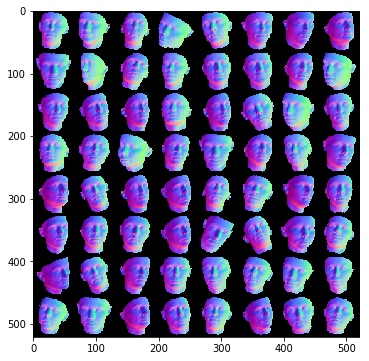

In [70]:
true_normal = torch.from_numpy(np.array(h5['true_normal']))
tNormal = Variable(true_normal)
tNormal = denorm(tNormal)
tMask = mask.type(torch.FloatTensor)
show(torchvision.utils.make_grid(tNormal.data * tMask, padding=1))

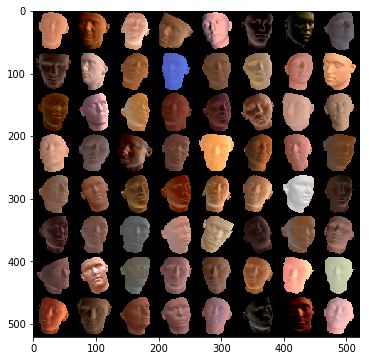

In [81]:
out = ShadingFromDataLoading(Variable(true_normal), expected_sh, shadingFromNet = True)
show(torchvision.utils.make_grid(out.data*mask, padding=1))

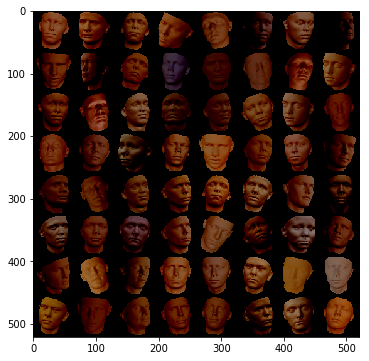

In [84]:
out = ShadingFromDataLoading(Variable(true_normal), predicted_sh, shadingFromNet = True)
show(torchvision.utils.make_grid(denorm(out).data*mask, padding=1))

In [47]:
predicted_sh

Variable containing:
-6.0544e-01  7.7402e-02  5.8790e-01  ...   1.0838e-01  1.6693e-01 -4.0471e-01
-6.6689e-01 -2.3119e-01  5.0839e-01  ...  -1.7277e-02  1.5060e-01 -5.8421e-01
-7.1418e-01  1.6576e-01  5.1464e-01  ...   1.1244e-01  1.4799e-01 -2.9009e-01
                ...                   ⋱                   ...                
-9.7483e-01  2.1647e-01  5.7542e-01  ...  -1.1108e-01  6.0381e-02 -2.9241e-01
-7.8349e-01 -4.1781e-01  4.6716e-01  ...   1.8276e-02  8.3383e-02 -3.2247e-01
-3.9362e-01  9.1050e-02  5.5252e-01  ...   2.2174e-02  8.3409e-02 -4.2510e-02
[torch.DoubleTensor of size 64x27]

In [48]:
expected_sh

Variable containing:
 9.3752e-01  1.5625e-01 -7.7528e-02  ...   5.4240e-03 -5.1187e-02  3.2489e-02
 6.5008e-01  3.5962e-01 -2.5457e-01  ...  -1.5720e-02  4.4937e-02  1.0223e-01
 9.8982e-01  1.8808e-01 -9.4321e-02  ...   4.4780e-02  1.8226e-02 -7.1970e-02
                ...                   ⋱                   ...                
 6.5880e-01  2.2336e-01 -5.7415e-01  ...  -6.0460e-03  1.3175e-01  8.3117e-02
 6.2203e-01  4.0544e-01 -3.4780e-01  ...  -4.6963e-02  1.2330e-01  2.0990e-01
 9.0360e-01  2.9511e-01 -2.0713e-02  ...   2.8695e-02  1.1092e-01 -3.0647e-02
[torch.DoubleTensor of size 64x27]

In [91]:
t1 = true_normal[0]
test_normal = t1.unsqueeze(0)
p_sh = predicted_sh.data[0]
p_sh = p_sh.unsqueeze(0)
e_sh = expected_sh.data[0]
e_sh = e_sh.unsqueeze(0)
print(test_normal.shape, p_sh.shape, e_sh.shape)

(torch.Size([1, 3, 64, 64]), torch.Size([1, 27]), torch.Size([1, 27]))


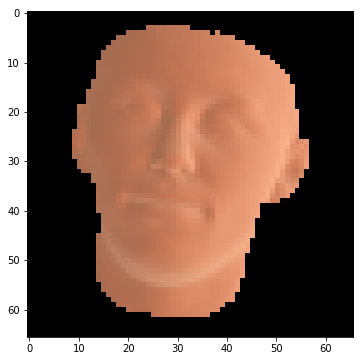

In [117]:
out = ShadingFromDataLoading(Variable(test_normal), Variable(e_sh), shadingFromNet = True)
show(torchvision.utils.make_grid(out.data*mask[0], padding=1))

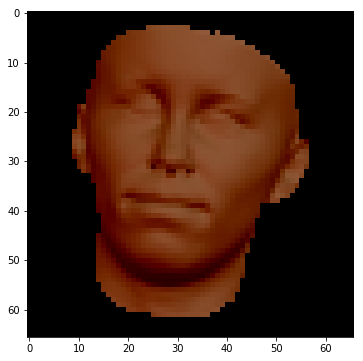

In [98]:
out = ShadingFromDataLoading(Variable(test_normal), Variable(p_sh), shadingFromNet = True)
show(torchvision.utils.make_grid(denorm(out).data*mask[0], padding=1))

In [99]:
print(p_sh)



Columns 0 to 9 
-0.6054  0.0774  0.5879 -0.2503 -0.0465 -0.0349  0.0224  0.0771 -0.2766 -1.2874

Columns 10 to 19 
 0.1255  0.6691 -0.4171 -0.0379 -0.0121  0.0612  0.0613 -0.3296 -1.7416  0.1508

Columns 20 to 26 
 0.7809 -0.5261 -0.0756 -0.0133  0.1084  0.1669 -0.4047
[torch.DoubleTensor of size 1x27]



In [100]:
print(e_sh)



Columns 0 to 9 
 0.9375  0.1562 -0.0775  0.0326 -0.0642 -0.0150  0.0199 -0.0547  0.0020  0.6842

Columns 10 to 19 
 0.1253 -0.1446  0.0227 -0.0601 -0.0419  0.0144 -0.0647  0.0275  0.5388  0.1094

Columns 20 to 26 
-0.1373  0.0138 -0.0661 -0.0562  0.0054 -0.0512  0.0325
[torch.DoubleTensor of size 1x27]



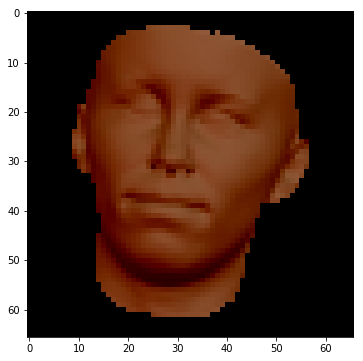

In [131]:
predicted_test_sh = torch.from_numpy(np.array([[-0.60544467, 0.07740171, 0.58790308, -0.25027499, -0.04654035, -0.03490694, 
                                   0.02235827, 0.07709812, -0.27660537, -1.28735328,  0.12553084,  0.66908264,
                                  -0.41714656, -0.03788317, -0.01206698,  0.06118108,  0.06128386, -0.32957044,
                                  -1.74162412,  0.15077385,  0.78091228, -0.52613705, -0.07559171, -0.01332346,
                                   0.10837717,  0.16692635, -0.4047116 ]]))
out = ShadingFromDataLoading(Variable(test_normal), Variable(predicted_test_sh), shadingFromNet = True)
show(torchvision.utils.make_grid(denorm(out).data*mask[0], padding=1))